# Table of Contents
* [1: LOAD FEATURES](#load)
    * [1.1 load embeddings](#emdessings)
    * [1.2 load hand selected features](#hand)
    * [1.3 concatenate embedding + hand selected](#concat)
    * [1.4 load labels](#labels)
    * [1.5 submission results](#prediction)
* [2: EXPLORE CORRELATION](#corrleation)
* [3: PREDICTIONS](#pred)
    * [3.1 400 best features](#best)
    * [3.2 subcorpora](#sub)

# 1 LOAD FEATURES <a class="anchor" id="load"></a>

In [1]:
import numpy as np
import pandas as pd

## 1.1 load embedding based features <a class="anchor" id="embeddings"></a>
1. target word embeddings
2. sentence embedding

3. target + sentences mean
4. target + sentences concatenation

In [2]:
single_target_embedding_train=np.genfromtxt('features/single_target_embedding_train.csv', delimiter=',')
single_target_embedding_trial=np.genfromtxt('features/single_target_embedding_trial.csv', delimiter=',')
single_target_embedding_test=np.genfromtxt('features/single_target_embedding_test.csv', delimiter=',')

single_sentence_embedding_train=np.genfromtxt('features/single_sentence_embedding_train.csv', delimiter=',')
single_sentence_embedding_trial=np.genfromtxt('features/single_sentence_embedding_trial.csv', delimiter=',')
single_sentence_embedding_test=np.genfromtxt('features/single_sentence_embedding_test.csv', delimiter=',')

single_mean_embedding_train = np.mean((single_target_embedding_train,single_sentence_embedding_train),axis=0)
single_mean_embedding_trial = np.mean((single_target_embedding_trial,single_sentence_embedding_trial),axis=0)
single_mean_embedding_test = np.mean((single_target_embedding_test,single_sentence_embedding_test),axis=0)

single_concat_embedding_train = np.concatenate((single_target_embedding_train,single_sentence_embedding_train),axis=1)
single_concat_embedding_trial = np.concatenate((single_target_embedding_trial,single_sentence_embedding_trial),axis=1)
single_concat_embedding_test = np.concatenate((single_target_embedding_test,single_sentence_embedding_test),axis=1)


print(single_mean_embedding_train.shape)
print(single_concat_embedding_train.shape)

(7662, 768)
(7662, 1536)


In [3]:
multi_target_embedding_train=np.genfromtxt('features/mwe_target_embedding_train.csv', delimiter=',')
multi_target_embedding_trial=np.genfromtxt('features/mwe_target_embedding_trial.csv', delimiter=',')
multi_target_embedding_test=np.genfromtxt('features/mwe_target_embedding_test.csv', delimiter=',')

multi_sentence_embedding_train=np.genfromtxt('features/mwe_sentence_embedding_train.csv', delimiter=',')
multi_sentence_embedding_trial=np.genfromtxt('features/mwe_sentence_embedding_trial.csv', delimiter=',')
multi_sentence_embedding_test=np.genfromtxt('features/mwe_sentence_embedding_test.csv', delimiter=',')

multi_mean_embedding_train = np.mean((multi_target_embedding_train,multi_sentence_embedding_train),axis=0)
multi_mean_embedding_trial = np.mean((multi_target_embedding_trial,multi_sentence_embedding_trial),axis=0)
multi_mean_embedding_test = np.mean((multi_target_embedding_test,multi_sentence_embedding_test),axis=0)

multi_concat_embedding_train = np.concatenate((multi_target_embedding_train,multi_sentence_embedding_train),axis=1)
multi_concat_embedding_trial = np.concatenate((multi_target_embedding_trial,multi_sentence_embedding_trial),axis=1)
multi_concat_embedding_test = np.concatenate((multi_target_embedding_test,multi_sentence_embedding_test),axis=1)

print(multi_mean_embedding_train.shape)
print(multi_concat_embedding_train.shape)

(1517, 768)
(1517, 1536)


In [4]:
# train + trial
X_embed_train_trial_mean_single = np.concatenate((single_mean_embedding_train, single_mean_embedding_trial),axis=0)
X_embed_train_trial_mean_multi = np.concatenate((multi_mean_embedding_train, multi_mean_embedding_trial),axis=0)

In [5]:
# single + multi
X_embed_train_mean_all = np.concatenate((single_mean_embedding_train,multi_mean_embedding_train),axis=0)
X_embed_trial_mean_all = np.concatenate((single_mean_embedding_trial,multi_mean_embedding_trial),axis=0)
X_embed_test_mean_all = np.concatenate((single_mean_embedding_test,multi_mean_embedding_test),axis=0)

In [6]:
# single + multi
X_embed_train_concat_all = np.concatenate((single_concat_embedding_train,multi_concat_embedding_train),axis=0)
X_embed_trial_concat_all = np.concatenate((single_concat_embedding_trial,multi_concat_embedding_trial),axis=0)
X_embed_test_concat_all = np.concatenate((single_concat_embedding_test,multi_concat_embedding_test),axis=0)

## 1.2 hand-selected features <a class="anchor" id="hand"></a>

* sentence_len - length of a sentence in characters
* tokens_per_word - average word length in BERT tokens in a sentence
* target_len - length of a target in BERT tokens (if more than 1, the word is rare)
* target_len_chars - length of a target in characters
* predicted_probs - log probability of a predicted MASK token
* target_probs - log probability of target tokens for MASK
* senses - number of senses in WordNet
* freqs - frequency 
* morfessor_len - number of morphs in a target
* morfessor_freqs - average morph frequency

In [7]:
single_train = pd.read_csv('features/single_train.csv', na_filter=False)
single_trial = pd.read_csv('features/single_trial.csv', na_filter=False)
single_test = pd.read_csv('features/single_test.csv', na_filter=False)

multi_train = pd.read_csv('features/multi_train.csv', na_filter=False)
multi_trial = pd.read_csv('features/multi_trial.csv', na_filter=False)
multi_test = pd.read_csv('features/multi_test.csv', na_filter=False)

In [8]:
def get_features(column_names, df):
    features = np.array(df[column_names[0]]).reshape(-1, 1)
    
    for column in column_names[1:]:
        next_feature = np.array(df[column]).reshape(-1, 1)
        features = np.concatenate((features,next_feature), axis=1)
    return features

In [9]:
columns = ['target_len', 'target_len_chars', 'target_probs', 'senses', 'freqs',
       'morfessor_len', 'morfessor_freqs']

#columns = ['sentence_len', 'tokens_per_word', 'target_len', 'target_len_chars',
       #'predicted_probs', 'target_probs', 'senses', 'freqs',
       #'morfessor_len', 'morfessor_freqs']

In [10]:
X_hand_train_single = get_features(columns, single_train)
X_hand_trial_single = get_features(columns, single_trial)
X_hand_test_single = get_features(columns, single_test)

X_hand_train_trial_single = np.concatenate((X_hand_train_single,X_hand_trial_single),axis = 0)

In [11]:
X_hand_train_multi = get_features(columns, multi_train)
X_hand_trial_multi = get_features(columns, multi_trial)
X_hand_test_multi = get_features(columns, multi_test)

X_hand_train_trial_multi = np.concatenate((X_hand_train_multi,X_hand_trial_multi),axis = 0)

### put into numpy arrays

In [12]:
# single + multi
X_hand_train_all = np.concatenate((X_hand_train_single, X_hand_train_multi), axis=0)
X_hand_trial_all = np.concatenate((X_hand_trial_single, X_hand_trial_multi), axis=0)
X_hand_test_all = np.concatenate((X_hand_test_single, X_hand_test_multi), axis=0)

In [13]:
# train+ trial, single + multi
X_hand_train_trial_all = np.concatenate((X_hand_train_all, X_hand_trial_all), axis=0)
X_hand_train_trial_single = np.concatenate((X_hand_train_single, X_hand_trial_single), axis=0)
X_hand_train_trial_multi = np.concatenate((X_hand_train_multi, X_hand_trial_multi), axis=0)

In [14]:
print(X_hand_train_single.shape)
print(X_hand_train_all.shape)

(7662, 7)
(9179, 7)


## 1.4 concatenate hand-selected and embedding <a class="anchor" id="concat"></a>

In [15]:
# train+trial single
X_train_trial_single_mean = np.concatenate((X_hand_train_trial_single, X_embed_train_trial_mean_single), axis=1)
# train+trial mwe
X_train_trial_multi_mean = np.concatenate((X_hand_train_trial_multi, X_embed_train_trial_mean_multi), axis=1)

# test for single
X_test_single_mean = np.concatenate((X_hand_test_single, single_mean_embedding_test), axis=1)
# test for multi
X_test_multi_mean = np.concatenate((X_hand_test_multi, multi_mean_embedding_test ), axis=1)

# single + multi
X_train_all_mean = np.concatenate((X_hand_train_all, X_embed_train_mean_all), axis=1)
X_trial_all_mean = np.concatenate((X_hand_trial_all, X_embed_trial_mean_all), axis=1)
X_test_all_mean = np.concatenate((X_hand_test_all, X_embed_test_mean_all), axis=1)

# single + multi
X_train_all_concat = np.concatenate((X_hand_train_all, X_embed_train_concat_all), axis=1)
X_trial_all_concat = np.concatenate((X_hand_trial_all, X_embed_trial_concat_all), axis=1)
X_test_all_concat = np.concatenate((X_hand_test_all, X_embed_test_concat_all), axis=1)

In [16]:
# train + trial, single + multi
X_train_everything_mean = np.concatenate((X_train_all_mean, X_trial_all_mean), axis=0)
X_train_everything_concat = np.concatenate((X_train_all_concat, X_trial_all_concat), axis=0)

## 1.4 get labels <a class="anchor" id="labels"></a>

In [17]:
y_train_single = single_train.complexity
y_trial_single = single_trial.complexity
y_test_single = single_test.complexity

y_train_multi = multi_train.complexity
y_trial_multi = multi_trial.complexity
y_test_multi = multi_test.complexity

# single + multi
y_train_all = y_train_single.tolist()+ y_train_multi.tolist()
y_trial_all = y_trial_single.tolist()+ y_trial_multi.tolist()
y_test_all = y_test_single.tolist()+ y_test_multi.tolist()

# train + trial
y_train_trial_single = y_train_single.tolist()+ y_trial_single.tolist() 
y_train_trial_multi = y_train_multi.tolist()+ y_trial_multi.tolist() 

# train + trial, single + multi
y_train_trial_everything = y_train_all + y_trial_all #single_train+multi_train+single_trial+multi_trial

## 1.5 prediction <a class="anchor" id="prediction"></a>
look if the results are the same as submitted
features that were used:
* mean embedding
* target_len 
* target_len_chars 
* target_probs 
* senses 
* freqs 
* morfessor_len 
* morfessor_freqs 


* linear regression for singles: 0.6714825027 / 0.6660303956 (with morfessor)
* linear regression for mwe: 0.7641139008364453 / 0.7832795852063086 (with morfessor)

* mlp for singles: 0.71205364
* mlp for mwe: 0.7796320834 / 0.7847828272 (with morfessor)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
import scipy
import sklearn

In [19]:
def print_metrics(y_true, y_pred):
    print('=========')
    print("Pearson", scipy.stats.pearsonr(y_true, y_pred))
    print("Spearman",scipy.stats.spearmanr(y_true, y_pred))
    print("MAE", sklearn.metrics.mean_absolute_error(y_true, y_pred))
    print("MSE", sklearn.metrics.mean_squared_error(y_true, y_pred))
    print("R2", sklearn.metrics.r2_score(y_true, y_pred))
    print('=========')

In [21]:
# 7 hand-labelled,  768 embedding
indices_no_morph = [0,1,2,3,4]+ [x for x in range(8,775)]

In [22]:
reg_lr = LinearRegression().fit(X_train_everything_mean, y_train_trial_everything)

single_scores_lr = reg_lr.predict(X_test_single_mean)
multi_scores_lr = reg_lr.predict(X_test_multi_mean)

In [23]:
print_metrics(y_test_single, single_scores_lr)
print_metrics(y_test_multi, multi_scores_lr)

Pearson (0.6660303955664706, 1.2968417152511241e-118)
Spearman SpearmanrResult(correlation=0.6380762707082122, pvalue=5.504463566699008e-106)
MAE 0.07468541675701165
MSE 0.009472814262149715
R2 0.41471917730787744
Pearson (0.7832795852065119, 2.0126549405268116e-39)
Spearman SpearmanrResult(correlation=0.7838422730526589, pvalue=1.633754527941613e-39)
MAE 0.07564620094614964
MSE 0.009414021773963506
R2 0.6099776178366909


In [24]:
# no morfessor
reg_lr = LinearRegression().fit(X_train_everything_mean[:,indices_no_morph], y_train_trial_everything)

single_scores_lr = reg_lr.predict(X_test_single_mean[:,indices_no_morph])
multi_scores_lr = reg_lr.predict(X_test_multi_mean[:,indices_no_morph])

print_metrics(y_test_single, single_scores_lr)
print_metrics(y_test_multi, multi_scores_lr)

Pearson (0.6714648359198303, 3.1383617020936733e-121)
Spearman SpearmanrResult(correlation=0.6454853548498315, pvalue=3.33208713292933e-109)
MAE 0.07554224196519231
MSE 0.009613837982576366
R2 0.4060059821763935
Pearson (0.7641971565056798, 1.6756642355296712e-36)
Spearman SpearmanrResult(correlation=0.7483351078576196, pvalue=2.812430970840922e-34)
MAE 0.0895849803648593
MSE 0.01221257639178088
R2 0.49403366052887643


## read MLP predictions

In [25]:
mlp_singles = pd.read_csv('single_test_mlp.csv',  header=None )
mlp_multi = pd.read_csv('multi_test_mlp.csv', header=None )

In [26]:
print_metrics(y_test_single, mlp_singles[1])
print_metrics(y_test_multi, mlp_multi[1])

Pearson (0.712053640315103, 1.0899033517164637e-142)
Spearman SpearmanrResult(correlation=0.6927331606018716, pvalue=4.98542767000867e-132)
MAE 0.06887740893441308
MSE 0.008064951277551998
R2 0.5017044367102026
Pearson (0.7847828271650756, 1.151244910091874e-39)
Spearman SpearmanrResult(correlation=0.7868968082208168, pvalue=5.208206651938672e-40)
MAE 0.08070033021763413
MSE 0.010099888628988278
R2 0.5815621933702364


# 2 EXPLORE CORRELATION <a class="anchor" id="correlation"></a>
1. What features of mwe and single words signal lexical complexity in a similar manner?
2. What features differ in their usefulness?


* 0 target_len
* 1 target_len_chars
* 2 target_probs
* 3 senses
* 4 freqs
* 5 morfessor_len
* 6 morfessor_freq

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
import matplotlib.pyplot as plt

In [28]:
def plot_scores(scores, feature_names=None):
   
    plt.bar(np.arange(len(scores)), scores)
    if feature_names!=None:
        plt.xticks(np.arange(len(scores)), feature_names, rotation='vertical')    
    plt.show()

def print_scores(scores, feature_names):
    for i in np.argsort(-scores):
        print(feature_names[i], scores[i]) 
    
    
def print_pearson(x,y,feature_names):
    for i, name in enumerate(feature_names):
        print("=====")
        print(name)
        print(scipy.stats.pearsonr(x[:,i], y))

In [29]:
# mwe+single
best_train_trial_mutual_all = SelectKBest(mutual_info_regression).fit(X_train_everything_mean, y_train_trial_everything)
best_train_trial_f_all = SelectKBest(f_regression).fit(X_train_everything_mean, y_train_trial_everything)

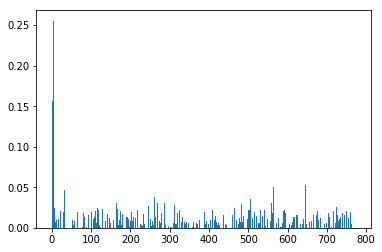

[  4   0   2   5   1 646   3 564 632   6  32 510 398 637 668 261 352 440
 506 341]
True


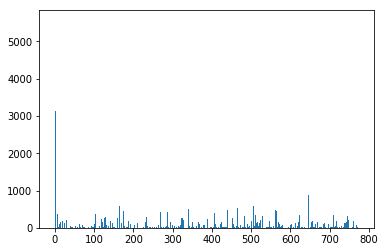

[  4   0   2   5 632 646 564  32 510 116 398 506 165   3 312 465 559 341
 440 562]
False
[True, False, True, True, True, True, False]


In [30]:
selected_features = [0,1,2,3,4,5,6]

plot_scores(best_train_trial_mutual_all.scores_)
top_20_mutual = np.argsort(-best_train_trial_mutual_all.scores_)[:20]
print(top_20_mutual)
print(all([f in top_20_mutual for f in selected_features]))

plot_scores(best_train_trial_f_all.scores_)
top_20_f = np.argsort(-best_train_trial_f_all.scores_)[:20]
print(top_20_f )
print(all([f in top_20_f for f in selected_features]))
print([f in top_20_f for f in selected_features])

In [31]:
# sigle train+trial
best_train_trial_mutual_single = SelectKBest(mutual_info_regression).fit(X_train_trial_single_mean, y_train_trial_single)
best_train_trial_f_single = SelectKBest(f_regression).fit(X_train_trial_single_mean, y_train_trial_single)

# mwe train+trial
best_train_trial_mutual_multi = SelectKBest(mutual_info_regression).fit(X_train_trial_multi_mean, y_train_trial_multi)
best_train_trial_f_multi = SelectKBest(f_regression).fit(X_train_trial_multi_mean, y_train_trial_multi)


SINGLEs


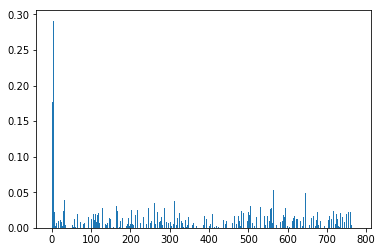

[  4   0   2   3   5   1 564 646   6 632  32 341 312 637 510 104 668 261
 540 566]
True


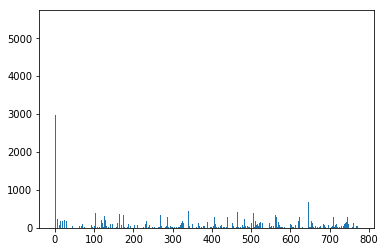

[  4   0   2   5   3 632 646 564 510  32 312 341 559 465 116 214 398 104
 506 540]
False
[True, False, True, True, True, True, False]


In [32]:
# singles
print("SINGLEs")
plot_scores(best_train_trial_mutual_single.scores_)
top_20_mutual = np.argsort(-best_train_trial_mutual_single.scores_)[:20]
print(top_20_mutual)
print(all([f in top_20_mutual for f in selected_features]))

plot_scores(best_train_trial_f_single.scores_)
top_20_f = np.argsort(-best_train_trial_f_single.scores_)[:20]
print(top_20_f)
print(all([f in top_20_f for f in selected_features]))
print([f in top_20_f for f in selected_features])


MWEs


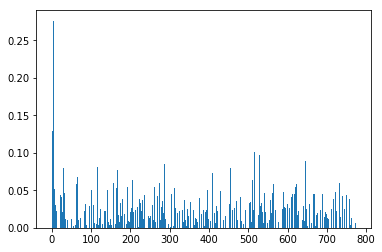

[  4   0   5   2   3 770 517 516 529 525 565 736 646 398   1 287  38 258
 116 455]
False
[True, True, True, True, True, True, False]


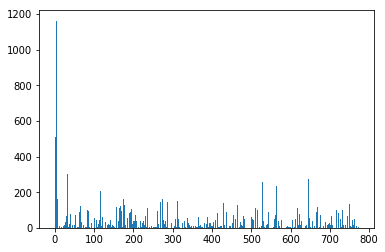

[  4   0   2   5  32   3 646 517 529 770 564   1 398 235 116 565 495 672
  29 514]
False
[True, True, True, True, True, True, False]


In [33]:
# mwe
print("MWEs")
plot_scores(best_train_trial_mutual_multi.scores_)
top_20_mutual = np.argsort(-best_train_trial_mutual_multi.scores_)[:20]
print(top_20_mutual)
print(all([f in top_20_mutual for f in selected_features]))
print([f in top_20_mutual for f in selected_features])


plot_scores(best_train_trial_f_multi.scores_)
top_20_f = np.argsort(-best_train_trial_f_multi.scores_)[:20]
print(top_20_f)
print(all([f in top_20_f for f in selected_features]))
print([f in top_20_f for f in selected_features])

# 3 PREDICTIONS <a class="anchor" id="pred"></a>
## 3.1 predict with the best half <a class="anchor" id="best"></a>

In [85]:
linear_400 = np.argsort(-best_train_trial_f_all.scores_)[:400]
non_linear_400 = np.argsort(-best_train_trial_mutual_all.scores_)[:400]

reg_lr = LinearRegression().fit(X_train_everything_mean[:,linear_400], y_train_trial_everything)

single_scores_lr = reg_lr.predict(X_test_single_mean[:,linear_400])
multi_scores_lr = reg_lr.predict(X_test_multi_mean[:,linear_400])

In [86]:
print_metrics(y_test_single, single_scores_lr)
print_metrics(y_test_multi, multi_scores_lr)

Pearson (0.6884278725492099, 9.099914155202677e-130)
Spearman SpearmanrResult(correlation=0.6609238891694248, pvalue=3.321383588079386e-116)
MAE 0.07303225228729512
MSE 0.008810844895969177
R2 0.4556191637863629
Pearson (0.7955258201321328, 1.857105450772185e-41)
Spearman SpearmanrResult(correlation=0.7994819554841354, pvalue=3.815607578349766e-42)
MAE 0.07420731811688554
MSE 0.0090644460290861
R2 0.6244605208973875


In [108]:
reg_mlp = MLPRegressor(hidden_layer_sizes=20, alpha=0.9).fit(X_train_everything_mean[:,non_linear_400], 
                                                                             y_train_trial_everything)

In [109]:
single_scores_mlp = reg_mlp.predict(X_test_single_mean[:,non_linear_400])
multi_scores_mlp = reg_mlp.predict(X_test_multi_mean[:,non_linear_400])

In [110]:
print_metrics(y_test_single, single_scores_mlp)
print_metrics(y_test_multi, multi_scores_mlp)

Pearson (0.7067243559589026, 1.1611954839318841e-139)
Spearman SpearmanrResult(correlation=0.6803150925186199, pvalue=1.3016283826127394e-125)
MAE 0.07008004803496981
MSE 0.008235481355933995
R2 0.4911681819281398
Pearson (0.7738643639498606, 6.031325928884517e-38)
Spearman SpearmanrResult(correlation=0.7734909533058834, pvalue=6.878662770522902e-38)
MAE 0.07801197094181886
MSE 0.009771683043989437
R2 0.5951597319328286


## 3.2 predict with subcorpora <a class="anchor" id="sub"></a>

In [334]:
reg_lr_single = LinearRegression().fit(X_train_trial_single_mean, y_train_trial_single)
reg_lr_multi = LinearRegression().fit(X_train_trial_multi_mean, y_train_trial_multi)

single_scores_lr = reg_lr_single.predict(X_test_single_mean)
multi_scores_lr = reg_lr_multi.predict(X_test_multi_mean)

print_metrics(y_test_single, single_scores_lr)
print_metrics(y_test_multi, multi_scores_lr)

Pearson (0.6693676289324663, 3.257666053229847e-120)
Spearman SpearmanrResult(correlation=0.6439911143579506, pvalue=1.5097465274868403e-108)
MAE 0.07492015683731251
MSE 0.009341662982317289
R2 0.4228224005774559
Pearson (0.6779871766725242, 4.0698506191628894e-26)
Spearman SpearmanrResult(correlation=0.6598248701010158, pvalue=2.2880674381062952e-24)
MAE 0.1039425826070276
MSE 0.01705886730125603
R2 0.29325210610358987


In [82]:
reg_mlp_single = MLPRegressor(random_state=1, hidden_layer_sizes=20, alpha=0.9).fit(X_train_trial_single_mean, y_train_trial_single)
reg_mlp_multi = MLPRegressor(random_state=1, hidden_layer_sizes=20, alpha=0.9).fit(X_train_trial_multi_mean, y_train_trial_multi)

single_scores_mlp = reg_mlp_single.predict(X_test_single_mean)
multi_scores_mlp = reg_mlp_multi.predict(X_test_multi_mean)

print_metrics(y_test_single, single_scores_mlp)
print_metrics(y_test_multi, multi_scores_mlp)

Pearson (0.7069611433082236, 8.547513482770498e-140)
Spearman SpearmanrResult(correlation=0.6860426551213175, pvalue=1.5664447901450286e-128)
MAE 0.07063203644058508
MSE 0.008195949446535403
R2 0.4936106734428154
Pearson (0.751826721273566, 9.414429377238612e-35)
Spearman SpearmanrResult(correlation=0.747985440160981, pvalue=3.135081335469885e-34)
MAE 0.0841263451321077
MSE 0.011086520048240251
R2 0.5406861102579059
